In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

In [3]:
img = cv2.imread("filament.tif", 0)

In [4]:
def histogram(img):

    hist = np.zeros(256, dtype=int)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel_val = img[i, j]
            hist[pixel_val] += 1
    return hist

def pdf(hist, total_pixels):


    return hist / total_pixels

def cdf(pdf_arr):
    return np.cumsum(pdf_arr)

def histogram_equalization(img):
    hist = histogram(img)
    total_pixels = img.shape[0] * img.shape[1]
    pdf_arr = pdf(hist, total_pixels)


    cdf_arr = cdf(pdf_arr)
    cdf_normalized = np.floor(cdf_arr * 255).astype(np.uint8)


    enhanced_img = cdf_normalized[img]

    return enhanced_img
def laplacian_enhancement(img):
    lap_filter = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])
    padded_img = np.pad(img, pad_width=1, mode='constant', constant_values=0)
    new_img = np.zeros_like(img, np.float64)
    for i in range(1, img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            window = padded_img[i-1:i+2, j-1:j+2]
            new_img[i-1, j-1] = np.sum(window * lap_filter)
    return new_img


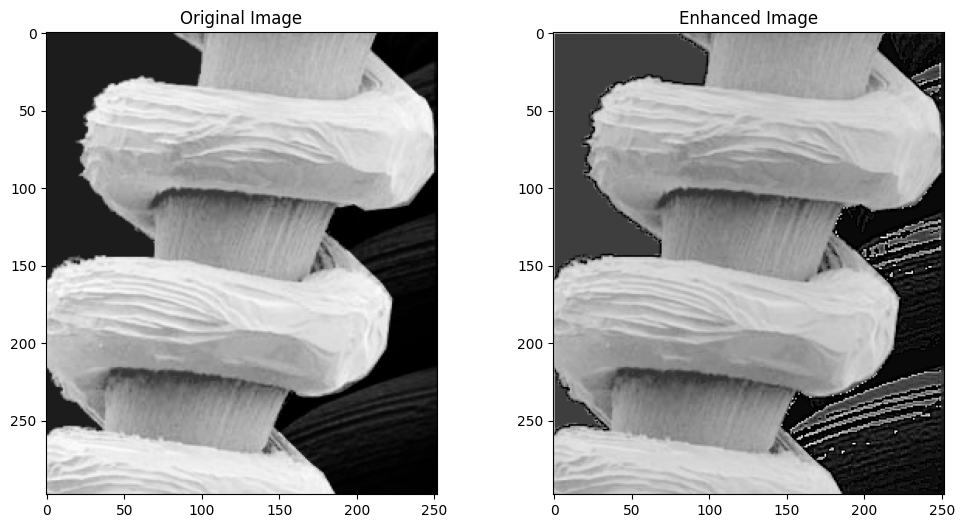

In [6]:
threshold = 50
dark_mask = img < threshold


img2 =histogram_equalization(img)
lap_img = laplacian_enhancement(img2)


sharpened_img = np.clip(img + lap_img, 0, 255).astype(np.uint8)


final_img = img.copy()
final_img[dark_mask] = img2[dark_mask]
final_img[dark_mask] = np.clip(final_img[dark_mask].astype(int) + lap_img[dark_mask].astype(int), 0, 255)


final_img = final_img.astype(np.uint8)


plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')


plt.subplot(1,2,2)
plt.title('Enhanced Image')
plt.imshow(final_img, cmap='gray')

plt.show()


In [3]:
def band_pass(image, l, u):
    mask = np.zeros(image.shape[:2], dtype=np.uint8)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            pixel = image[i, j]
            if all(l <= pixel) and all(pixel <= u):
                mask[i, j] = 255
            else:
                mask[i, j] = 0

    return mask

img = cv2.imread('Fig1.png')


hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


l_red = np.array([0, 70, 50])
u_red = np.array([10, 255, 255])


mask = band_pass(hsv, l_red, u_red)


contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#print(contours[0])
red_count = 0

print(len(contours))
for cnt in contours:
    area = cv2.contourArea(cnt)
    print("area : ",area)

    if area > 50:
        red_count += 1
        M = cv2.moments(cnt)
        print("Moments : ", M)

        if M['m00'] != 0:
            cx = int(M['m10'] / M['m00'])
            cy = int(M['m01'] / M['m00'])

            cv2.circle(img, (cx, cy), 3, (0, 0, 0), -1)


print(red_count)

#plt.imshow(img)

cv2.imshow('marked red crcles', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


11
area :  85.5
Moments :  {'m00': 85.5, 'm10': 17334.333333333332, 'm01': 10746.333333333332, 'm20': 3514947.75, 'm11': 2178733.7916666665, 'm02': 1351285.0833333333, 'm30': 712855160.2, 'm21': 441792895.48333335, 'm12': 273964063.15, 'm03': 169990978.20000002, 'mu20': 572.1697530872189, 'mu11': 14.211419753264636, 'mu02': 598.7662443148438, 'mu30': 45.460859417915344, 'mu21': -3.4842020091600716, 'mu12': -48.00986814746284, 'mu03': -4.456858664751053, 'nu20': 0.07826951924861923, 'nu11': 0.0019440401837508476, 'nu02': 0.08190776571455746, 'nu30': 0.0006725465586539481, 'nu21': -5.154517756416035e-05, 'nu12': -0.0007102565155484376, 'nu03': -6.59346302679907e-05}
area :  85.5
Moments :  {'m00': 85.5, 'm10': 15976.166666666666, 'm01': 10748.333333333332, 'm20': 2985806.583333333, 'm11': 2008414.375, 'm02': 1351793.0833333333, 'm30': 558127477.0500001, 'm21': 375360145.23333335, 'm12': 252596878.1, 'm03': 170087755.20000002, 'mu20': 567.9709226768464, 'mu11': 26.48351202113554, 'mu02': 

In [38]:
cv2.imshow("",final_img)

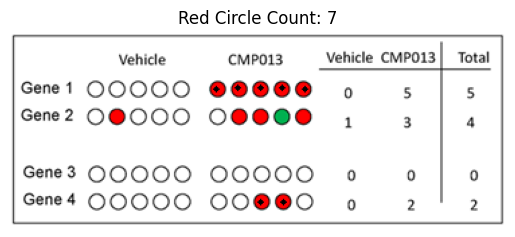

Total red circles: 7


In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def m_red(image):
    original = image.copy()

    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    l_red1 = np.array([0, 70, 50])
    u_red1 = np.array([10, 255, 255])

    red_mask = cv2.inRange(hsv, l_red1, u_red1)

    kernel = np.ones((5, 5), np.uint8)

    contours, _ = cv2.findContours(red_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    red_centers = []

    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 50:
            points = cnt.reshape(-1, 2)
            cx = int(np.mean(points[:, 0]))
            cy = int(np.mean(points[:, 1]))
            red_centers.append((cx, cy))
            cv2.circle(original, (cx, cy), 2, (0, 0, 0), -1)

    output_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)



    plt.imshow(output_rgb)
    plt.title(f"Red Circle Count: {len(red_centers)}")
    plt.axis('off')
    plt.show()

    return len(red_centers)


img = cv2.imread("Fig1.png")
count = m_red(img)
print(f"Total red circles: {count}")


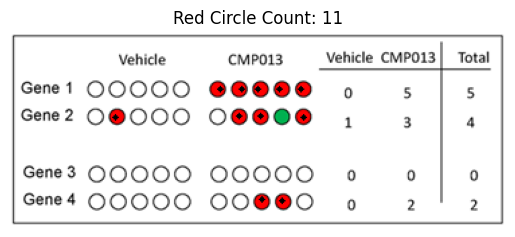

Total red circles: 11


In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def mark_red(image_path):

    image = cv2.imread(image_path)
    original = image.copy()


    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)



    red_mask = cv2.inRange(image, (0, 0, 255), (0, 0, 255))


    kernel = np.ones((5, 5), np.uint8)
    red_mask = cv2.erode(red_mask, kernel, iterations=1)
    red_mask = cv2.dilate(red_mask, kernel, iterations=2)


    contours, _ = cv2.findContours(red_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    red_centers = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 50:
            points = cnt.reshape(-1, 2)
            cx = int(np.mean(points[:, 0]))
            cy = int(np.mean(points[:, 1]))
            red_centers.append((cx, cy))
            cv2.circle(original, (cx, cy), 2, (0, 0, 0), -1)

    output_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)


    plt.imshow(output_rgb)
    plt.title(f"Red Circle Count: {len(red_centers)}")
    plt.axis('off')
    plt.show()

    return len(red_centers)


image_path = "Fig1.png"
count = mark_red(image_path)
print(f"Total red circles: {count}")